2019-07-23 14:21:22 MainProcess:INFO:root:Created Konrad object:
RCE(
    atmosphere=Atmosphere,
    radiation=RRTMG,
    ozone=OzonePressure,
    humidity=FixedRH,
    surface=SurfaceHeatCapacity,
    cloud=<konrad.cloud.ClearSky object at 0x7f5b857952b0>,
    convection=HardAdjustment,
    lapserate=MoistLapseRate,
    upwelling=NoUpwelling,
    max_duration=6000.0,
    timestep=0.6666666666666666,
    writeevery=1.0,
    max_iterations=9000.0,
    niter=0,
    delta=0.0001,
    deltaT=None,
    converged=False,
    outfile=None,
    nchandler=None,
    experiment=RCE,
)
2019-07-23 14:21:22 MainProcess:INFO:konrad.core:Start RCE model run.
2019-07-23 14:21:22 MainProcess:INFO:konrad.core:Enter iteration 0.
2019-07-23 14:21:24 MainProcess:INFO:konrad.core:Enter iteration 100.
2019-07-23 14:21:26 MainProcess:INFO:konrad.core:Enter iteration 200.
2019-07-23 14:21:29 MainProcess:INFO:konrad.core:Enter iteration 300.
2019-07-23 14:21:31 MainProcess:INFO:konrad.core:Enter iteration 400.
20

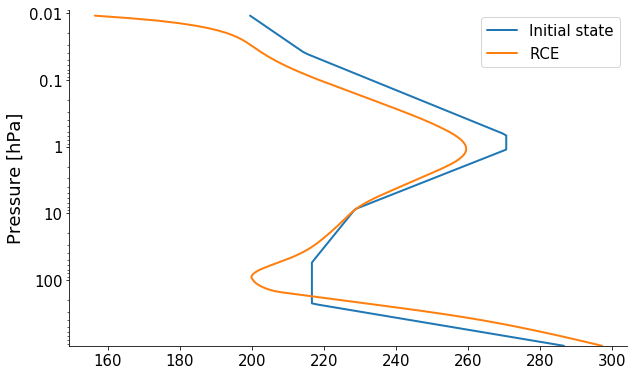

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad

plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)

atmosphere = konrad.atmosphere.Atmosphere(plev)

atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(),  # Use RRTMG radiation scheme.
    humidity = konrad.humidity.FixedRH(rh_func=konrad.humidity.HeightConstant()), 
                            #Add a relative humidity profile preserved under temperature changes
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='RCE')
ax.legend()